### Measurement uncertainties from the total SFR from the MPA-JHU catalog 
We're interested in quantifying the measurement uncertainty from repeat spectra in Brinchmann's SFR catalog

In [1]:
import numpy as np 
import scipy as sp 

import env
import util as UT
from ChangTools.fitstables import mrdfits

In [2]:
from pydl.pydlutils.spheregroup import spherematch

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in the total SFRs from https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/sfrs.html . These SFRs are derived from spectra but later aperture corrected using Salim et al.(2007)'s method. 

In [4]:
# data with the galaxy information
data_gals = mrdfits(UT.dat_dir()+'gal_info_dr7_v5_2.fit.gz')
# data with the SFR information 
data_sfrs = mrdfits(UT.dat_dir()+'gal_totsfr_dr7_v5_2.fits.gz')

if len(data_gals.ra) != len(data_sfrs.median):
    raise ValueError("the data should have the same number of galaxies")

`spherematch` using 3'' for 10,000 galaxies. Otherwise laptop explodes.

In [5]:
#ngal = len(data_gals.ra)
ngal = 10000

In [6]:
matches = spherematch(data_gals.ra[:10000], data_gals.dec[:10000], 
                      data_gals.ra[:10000], data_gals.dec[:10000], 
                      0.000833333, maxmatch=0)

In [7]:
m0, m1, d_m = matches

In [8]:
n_matches = np.zeros(ngal)
sfr_list = [[] for i in range(ngal)]

for i in range(ngal): 
    ism = (i == m0)
    n_matches[i] = np.sum(ism)
    if n_matches[i] > 1:         
        #print '#', data_gals.ra[i], data_gals.dec[i], data_sfrs.median[i]
        sfr_list[i] = data_sfrs.median[m1[np.where(ism)]]
        #for r,d,s in zip(data_gals.ra[m1[np.where(ism)]], data_gals.dec[m1[np.where(ism)]], data_sfrs.median[m1[np.where(ism)]]): 
        #    print r, d, s
    #sfr_list[i] = data_sfrs.median[:10000][ism]

In [9]:
for i in np.where(n_matches > 1)[0]: 
    print sfr_list[i] 
    print np.mean(sfr_list[i]), np.std(sfr_list[i])

[-0.46492234 -0.51970792]
-0.492315 0.0273928
[ 0.25182927  0.17580664]
0.213818 0.0380113
[-0.71020395 -0.64012742]
-0.675166 0.0350383
[-99. -99.]
-99.0 0.0
[-0.32268193 -0.12419786]
-0.22344 0.099242
[-0.68908435 -0.73084104]
-0.709963 0.0208783
[-0.38424662 -0.5622921 ]
-0.473269 0.0890227
[-0.43859637 -0.53787857]
-0.488237 0.0496411
[ 0.04046527  0.08544444]
0.0629549 0.0224896
[-0.52789098 -0.5       ]
-0.513945 0.0139455
[-0.1865475  -0.19935326]
-0.19295 0.00640288
[-0.43102181 -0.41524124]
-0.423132 0.00789028
[-0.6210674  -0.80454516]
-0.712806 0.0917389
[-99. -99.]
-99.0 0.0
[-0.16666667 -0.16393444]
-0.165301 0.00136612
[-0.48371553 -0.4310267 ]
-0.457371 0.0263444
[ 0.52006376 -0.35505944]
0.0825022 0.437562
[ 0.77659583  0.97942191]
0.878009 0.101413
[-0.44455767 -0.42843744 -0.45277759]
-0.441924 0.0101098
[-0.96133322 -0.98453939]
-0.972936 0.0116031
[ 0.47251397  0.31957304]
0.396044 0.0764705
[-1.9517858  -1.94255316]
-1.94717 0.00461632
[ 0.21124183  0.29250017]
0.2

-2.57386 0.0457984
[-1.14966428 -1.08809519]
-1.11888 0.0307845
[-0.56510043 -0.56354815]
-0.564324 0.000776142
[-0.53611088 -0.60687494]
-0.571493 0.035382
[-0.22465743 -0.30117619]
-0.262917 0.0382594
[ 1.39765108  1.28269625]
1.34017 0.0574774
[ 0.92233163  0.62324721]
0.772789 0.149542
[-1.2603333  -1.25698328]
-1.25866 0.00167501
[-0.28699979 -0.28461519]
-0.285807 0.0011923
[-99. -99.]
-99.0 0.0
[-0.38795626 -0.35068017]
-0.369318 0.018638
[ 0.15684092  0.17567892]
0.16626 0.009419
[-0.02803851 -0.25584188]
-0.14194 0.113902
[-0.39160162 -0.53817713]
-0.464889 0.0732878
[ 1.70807946  1.67814136]
1.69311 0.0149691
[ 0.56477743  0.61953121]
0.592154 0.0273769
[-0.63120002 -0.65637589]
-0.643788 0.0125879
[-1.27946424 -1.28937495 -1.35649335]
-1.30844 0.034216
[ 0.07790701  0.0724182 ]
0.0751626 0.00274441
[ 1.0390923  1.0874393]
1.06327 0.0241735
[ 0.51164246  0.73025763]
0.62095 0.109308
[-1.13070166 -1.01832461]
-1.07451 0.0561885
[-0.41000003 -0.47448969 -0.33012804]
-0.404873 0

-1.13411 0.00297695
[-0.5835402  -0.51833326]
-0.550937 0.0326035
[-0.88950622 -0.93064511]
-0.910076 0.0205694
[ 0.2680752   0.31255519]
0.290315 0.02224
[ 0.62864864  0.79544175]
0.712045 0.0833966
[-99. -99.]
-99.0 0.0
[-0.14710535 -0.13325003]
-0.140178 0.00692766
[-0.71649861 -0.64052141]
-0.67851 0.0379886
[-0.90943402 -0.2641955 ]
-0.586815 0.322619
[-99. -99.]
-99.0 0.0
[-0.81459832 -0.81402856]
-0.814313 0.00028488
[-99. -99.]
-99.0 0.0
[-1.32007039 -0.68235284]
-1.00121 0.318859
[ 0.55842406  0.34845191]
0.453438 0.104986
[-99. -99.]
-99.0 0.0
[-0.64759046 -0.61655629]
-0.632073 0.0155171
[-0.87388057 -0.79191595]
-0.832898 0.0409823
[ 0.97034401  0.97566503]
0.973005 0.00266051
[ 0.37430555  0.31186265]
0.343084 0.0312214
[-1.19196427 -0.43197483]
-0.81197 0.379995
[-1.33558273 -1.32236838]
-1.32898 0.00660717
[-0.88933337 -0.90094948]
-0.895141 0.00580806
[-0.62566668 -0.68120295]
-0.653435 0.0277681
[-0.34363624 -0.21756744]
-0.280602 0.0630344
[-99. -99.]
-99.0 0.0
[-0.40

-1.02769 0.0167326
[ 0.07937628  0.02702713]
0.0532017 0.0261746
[-99. -99.]
-99.0 0.0
[-2.66428566 -2.61157012]
-2.63793 0.0263578
[-1.19313729 -1.20236492]
-1.19775 0.00461382
[-99. -99.]
-99.0 0.0
[ 0.97733724  0.67435086]
0.825844 0.151493
[-0.89119506 -0.85439181]
-0.872793 0.0184016
[-99. -99.]
-99.0 0.0
[ 0.22855166  0.17438035]
0.201466 0.0270857
[-0.51937491 -0.54478502]
-0.53208 0.0127051
[ 0.3249276   0.49932796]
0.412128 0.0872002
[ 0.26511261  0.27625009]
0.270681 0.00556874
[-1.11449265 -0.51843959]
-0.816466 0.298027
[ 0.09777967  0.06791507]
0.0828474 0.0149323
[-0.41580516 -0.41516206]
-0.415484 0.000321552
[ 0.60799992  0.58471698]
0.596358 0.0116415
[-0.87830883 -0.87851852]
-0.878414 0.000104845
[ 0.09260748  0.04608956]
0.0693485 0.023259
[ 0.74270076  0.77906471]
0.760883 0.018182
[-1.30445206 -1.29252326]
-1.29849 0.0059644
[-0.42269936 -0.46213859]
-0.442419 0.0197196
[ 0.13726008  0.01117459]
0.0742173 0.0630427
[-1.0532608 -1.005988 ]
-1.02962 0.0236364
[ 0.87

1.2666 0.0233249
[ 0.31612256  0.32085115]
0.318487 0.00236429
[-0.35808817 -0.36634612]
-0.362217 0.00412898
[-99. -99.]
-99.0 0.0
[-99. -99.]
-99.0 0.0
[-0.71380585 -0.72581691]
-0.719811 0.00600553
[ 0.09972593  0.07883724]
0.0892816 0.0104443
[-0.67251652 -0.70067096]
-0.686594 0.0140772
[ 1.03218007  0.89236993]
0.962275 0.0699051
[-0.31228048 -0.32126418]
-0.316772 0.00449185
[-0.55170548 -0.54052061]
-0.546113 0.00559244
[-0.36985815 -0.39600009]
-0.382929 0.013071
[-0.79970902 -0.79578286]
-0.797746 0.00196308
[ 0.85285318  0.82307696]
0.837965 0.0148881
[-0.7032845  -0.74353737]
-0.723411 0.0201264
[-0.5753786  -0.44011962]
-0.507749 0.0676295
[-0.6989724  -0.69974208]
-0.699357 0.000384837
[-0.23111695 -0.24789473]
-0.239506 0.00838889
[-0.95449424 -0.81201094]
-0.883253 0.0712416
[-0.1017543 -0.1103174]
-0.106036 0.00428155
[ 0.3192212   0.29292947]
0.306075 0.0131459
[-0.06272703 -0.98966664]
-0.526197 0.46347
[-0.65104902 -0.65607148]
-0.65356 0.00251123
[ 0.73950005  0.62

-99.0 0.0
[-0.57347542 -0.57821411]
-0.575845 0.00236934
[-0.82554728 -0.85980386]
-0.842676 0.0171283
[-0.67943257 -0.72682917]
-0.703131 0.0236983
[ 0.18985225  0.14988272]
0.169867 0.0199848
[-0.78376943 -0.18049845]
-0.482134 0.301636
[-0.83499986 -0.79932857]
-0.817164 0.0178356
[-0.3247498  -0.15507819]
-0.239914 0.0848358
[-0.87607145 -0.19693123]
-0.536501 0.33957
[ 0.21044798  0.18386027]
0.197154 0.0132939
[ 0.38329086  0.30855277]
0.345922 0.037369
[-0.10966537 -0.10871705]
-0.109191 0.000474162
[ 1.25936258  0.52576286]
0.892563 0.3668
[-1.18309855 -1.20718956]
-1.19514 0.0120455
[-99. -99.]
-99.0 0.0
[ 0.99003071  0.88224047]
0.936136 0.0538951
[ 0.02225618  0.15737717]
0.0898167 0.0675605
[-0.03213195  0.38894743]
0.178408 0.21054
[ 0.21342126  0.2022225 ]
0.207822 0.00559938
[-1.22928572 -1.23968256]
-1.23448 0.00519842
[ 1.02630067  0.97222239]
0.999261 0.0270391
[ 0.86006385  0.93597037]
0.898017 0.0379533
[ 0.67958879  0.70631289]
0.692951 0.0133621
[ 0.34751543  0.39

[-0.56580204 -0.55915815]
-0.56248 0.00332195
[-0.49649122 -0.55979705]
-0.528144 0.0316529
[ 0.27957758  0.22162178]
0.2506 0.0289779
[ 0.03501305  0.20590657]
0.12046 0.0854468
[ 1.17211556  1.07256639]
1.12234 0.0497746
[-0.69319355 -0.67930102]
-0.686247 0.00694627
[ 0.8045966   0.83353174]
0.819064 0.0144676
[-0.57838523 -0.27372867]
-0.426057 0.152328
[-0.39891955 -0.34191906]
-0.370419 0.0285002
[ 1.09453773  1.35576916]
1.22515 0.130616
[ 1.06861985  1.12984502]
1.09923 0.0306126
[ 0.02554358  0.00891816]
0.0172309 0.00831271
[-1.18470144 -1.14692295]
-1.16581 0.0188892
[ 0.32339188  0.23118943]
0.277291 0.0461012
[-0.8106916  -0.53060591]
-0.670649 0.140043
[-0.79964763 -0.80392128]
-0.801784 0.00213683
[-99. -99.]
-99.0 0.0
[-0.53550428 -0.54825276]
-0.541879 0.00637424
[-1.10850334 -1.07564092]
-1.09207 0.0164312
[ 0.20899013  0.24375004]
0.22637 0.01738
[ 0.15671355  0.13041669]
0.143565 0.0131484
[-0.87379313 -0.92372257]
-0.898758 0.0249647
[-0.39348412 -0.39295983]
-0.39

[-0.62176871 -0.58239418]
-0.602081 0.0196873
[ 0.47594354  0.45713082]
0.466537 0.00940636
[-0.91794872 -0.91401517]
-0.915982 0.00196677
[ 0.95268625  0.88725871]
0.919972 0.0327138
[-0.0221361  -0.20451696]
-0.113327 0.0911904
[-0.81666642 -0.77580631]
-0.796236 0.0204301
[-1.02733326 -0.99819821]
-1.01277 0.0145675
[-99. -99.]
-99.0 0.0
[-2.59659219 -2.5990808 ]
-2.59784 0.00124431
[ 0.71812314  0.67879879]
0.698461 0.0196622
[ 0.25040454  0.36940387]
0.309904 0.0594997
[-99. -99.]
-99.0 0.0
[-99. -99.]
-99.0 0.0
[-99. -99.]
-99.0 0.0
[ 0.57725328  0.50681823]
0.542036 0.0352175
[-99. -99.]
-99.0 0.0
[-0.10317452 -0.08535338]
-0.094264 0.00891057
[-0.89081639 -0.47372872]
-0.682273 0.208544
[ 0.02425857 -0.03223511]
-0.00398827 0.0282468
[ 0.93665439  0.9427138 ]
0.939684 0.0030297
[ 0.37682244  0.15812896]
0.267476 0.109347
[ 0.79768962  0.70183325]
0.749761 0.0479282
[-0.35432091 -0.35572281]
-0.355022 0.000700951
[-0.01774183 -0.01745142]
-0.0175966 0.000145205
[-0.35307962 -0.3

-0.875465 0.0147716
[-0.25057143 -0.24685863]
-0.248715 0.0018564
[ 0.10638881  0.08588234]
0.0961356 0.0102532
[ 1.19321012  1.22732854]
1.21027 0.0170592
[ 0.47594354  0.45713082]
0.466537 0.00940636
[ 1.18158865  1.28389072]
1.23274 0.051151
[-1.02360249 -0.98871946]
-1.00616 0.0174415
[ 0.50196427  0.46457586]
0.48327 0.0186942
[ 0.80654222  0.81923085]
0.812887 0.00634432
[-0.4931159  -0.46532834]
-0.479222 0.0138938
[-0.62654322 -0.72050351]
-0.673523 0.0469801
[-0.62176871 -0.58239418]
-0.602081 0.0196873
[-1.31848514 -1.27595031]
-1.29722 0.0212674
[ 0.45529437  0.46778262]
0.461538 0.00624412
[-0.48279214 -0.46620676]
-0.474499 0.00829269
[-0.91794872 -0.91401517]
-0.915982 0.00196677
[ 0.71812314  0.67879879]
0.698461 0.0196622
[-0.81666642 -0.77580631]
-0.796236 0.0204301
[-1.02733326 -0.99819821]
-1.01277 0.0145675
[-99. -99.]
-99.0 0.0
[-2.5990808  -2.59659219]
-2.59784 0.00124431
[ 0.95268625  0.88725871]
0.919972 0.0327138
[-99. -99.]
-99.0 0.0
[-0.20451696 -0.0221361 ]


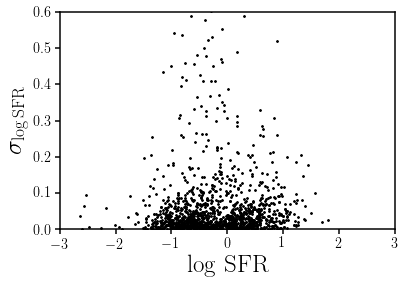

In [14]:
fig = plt.figure()
sub = fig.add_subplot(111)
sigs = []
for i in np.where(n_matches > 1)[0]: 
    if -99. in sfr_list[i]:
        continue
    sub.scatter([np.mean(sfr_list[i])], [np.std(sfr_list[i], ddof=1)], c='k', s=2)
    sigs.append(np.std(sfr_list[i], ddof=1))
sub.set_xlim([-3., 3.])
sub.set_xlabel('log SFR', fontsize=25)
sub.set_ylim([0., 0.6])
sub.set_ylabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)
plt.show()

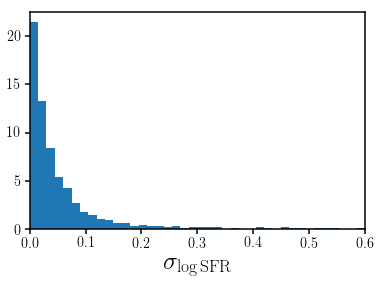

In [21]:
plt.hist(np.array(sigs), bins=40, range=[0.0, 0.6], normed=True)
plt.xlim([0., 0.6])
plt.xlabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)